In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
iris = datasets.load_iris()

In [5]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']


In [6]:
model = KMeans(n_clusters=3)
model.fit(x)

c:\Users\dines\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [7]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, 'K Mean Classification')

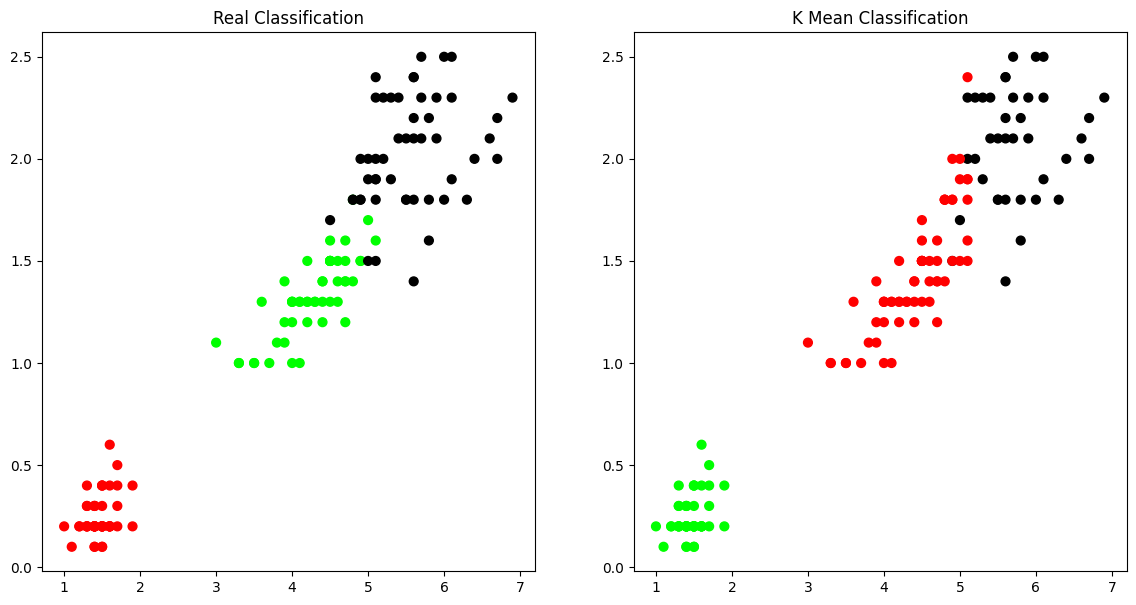

In [8]:
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')


In [9]:
plt.figure(figsize=(14,7))
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print (predY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


<Figure size 1400x700 with 0 Axes>

The accuracy score of K-Mean:  0.8933333333333333
The Confusion matrixof K-Mean:  [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


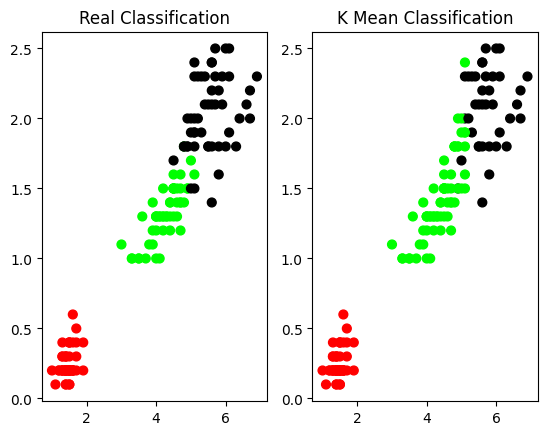

In [10]:
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[predY], s=40)
plt.title('K Mean Classification')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, predY))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, predY))


In [11]:
from sklearn import preprocessing

In [12]:
scaler = preprocessing.StandardScaler()
scaler.fit(x)
xsa = scaler.transform(x)
xs = pd.DataFrame(xsa, columns = x.columns)

In [13]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm = gmm.predict(xs)

The accuracy score of EM:  0.36666666666666664
The Confusion matrix of EM:  [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]


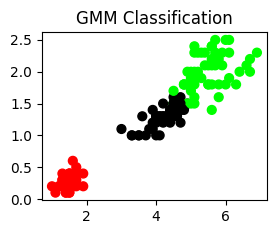

In [14]:
plt.subplot(2, 2, 3)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM Classification')
print('The accuracy score of EM: ',sm.accuracy_score(y, y_cluster_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_cluster_gmm))
